In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 사용할 데이터 선언
arr_fruits = np.load('./fruits_300.npy')
arr_fruits_2D = arr_fruits.reshape(-1, 100 * 100)

In [2]:
## 그래프화 함수 선언
def draw_fruits(arr, ratio = 1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio),
                                                   squeeze= False)
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i,j].imshow(arr[i*10 + j], cmap = 'gray_r')
            axs[i,j].axis('off')
    plt.show()

In [3]:
## 차원 축소를 위한 모듈 import
from sklearn.decomposition import PCA

## 객체 선언 후 훈련
## 주성분을 50개로 지정
c_pca = PCA(n_components=50)
c_pca.fit(arr_fruits_2D)

PCA(n_components=50)

In [4]:
## 주성분확인
print(c_pca.components_.shape)

(50, 10000)


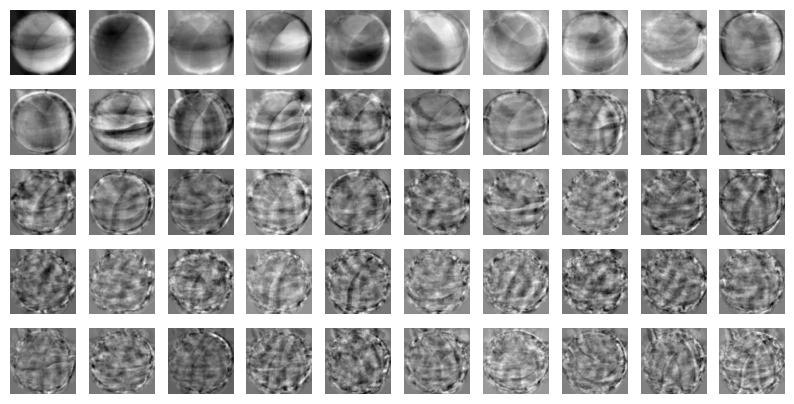

In [5]:
## 주성분을 이미지화 해서 확인
draw_fruits(c_pca.components_.reshape(-1,100,100))

In [6]:
## 원본 데이터 모양 확인
print(arr_fruits_2D.shape)

(300, 10000)


In [7]:
## 원본 데이터를 주성분으로 변형 시켜 축소

c_fruits_pca = c_pca.transform(arr_fruits_2D)
print(c_fruits_pca.shape)

(300, 50)


In [8]:
## 축소된 데이터를 다시 확장
c_fruits_inverse = c_pca.inverse_transform(c_fruits_pca)
print(c_fruits_inverse.shape)

(300, 10000)


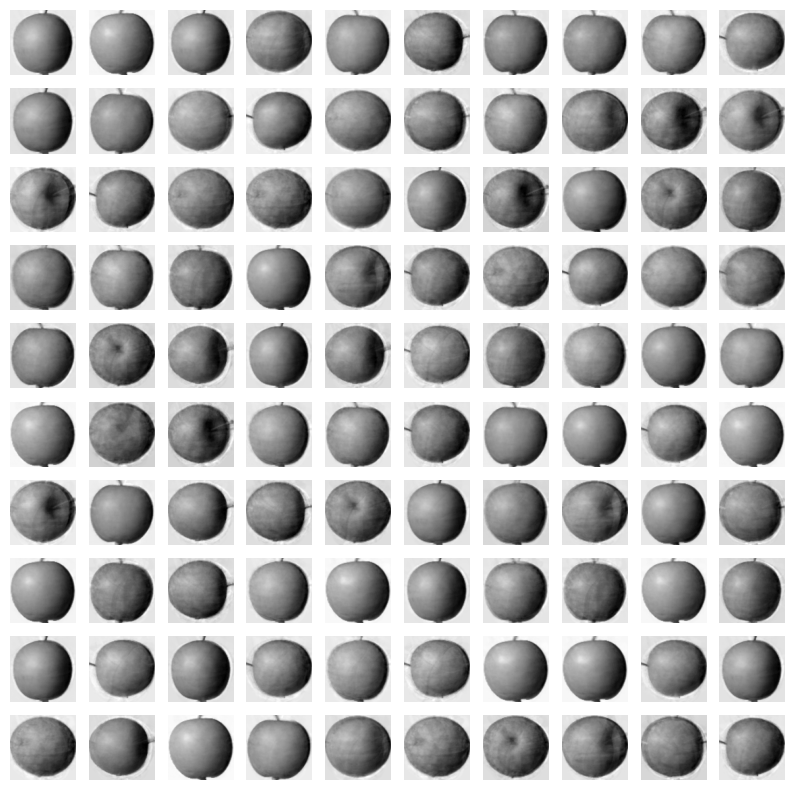

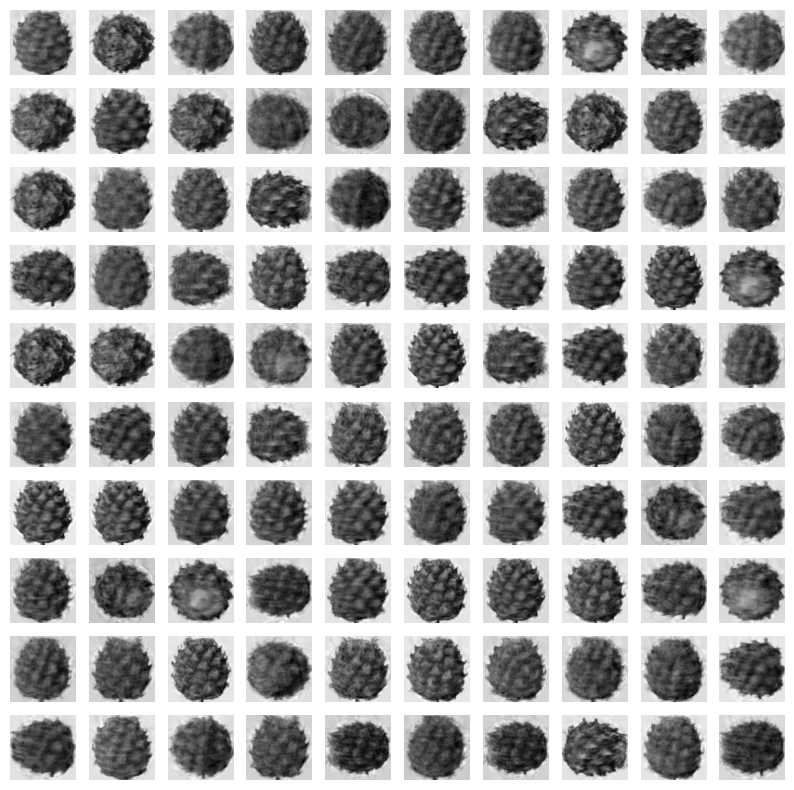

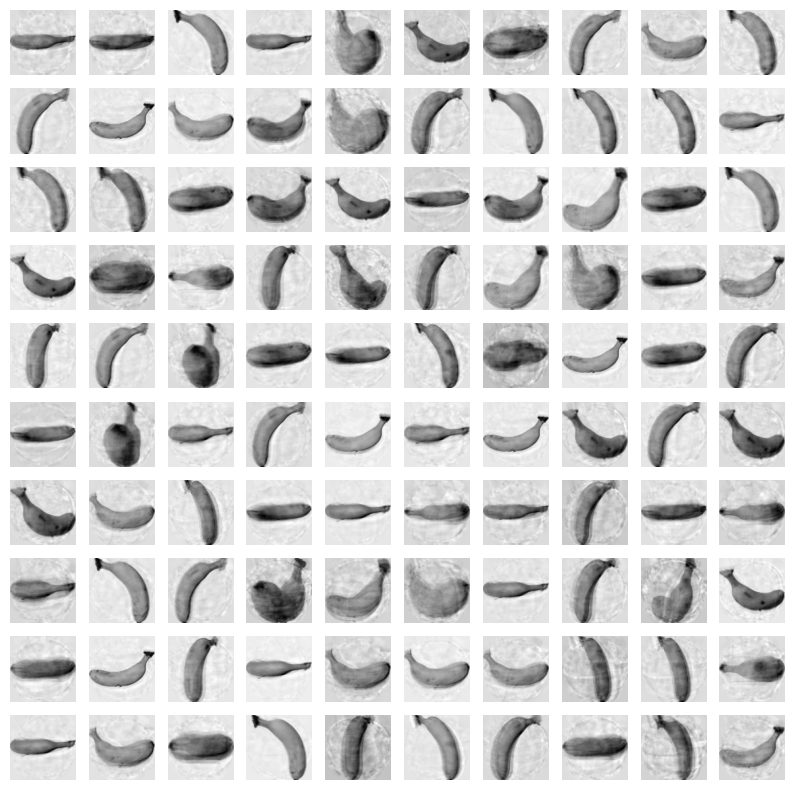

In [9]:
## 다시 확장 시킨 데이터를 이미지화 후 비교
## 분산을 가장 잘 보존하도록 해주는 50개의 특성으로
## 다시 확장 한것이라 기존 이미지에 거의 가깝게 복구
arr_fruits_reconstruct = c_fruits_inverse.reshape(-1, 100, 100)

for start in [0,100,200]:
    draw_fruits(arr_fruits_reconstruct[start: start+100])
    print('\n')

In [10]:
## 분산이 유지된 비율 확인
print(np.sum(c_pca.explained_variance_ratio_))

0.9215163536447075


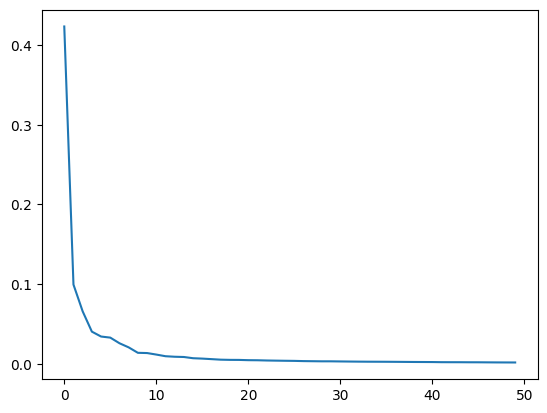

In [11]:
## 그래프로 몇개의 주성분이 있을때 원본과 차이가 없는지 확인
plt.plot(c_pca.explained_variance_ratio_)
plt.show()

In [12]:
## 축소한 데이터를 다른 모델에 사용하기 위해 필요한 모델 import
from sklearn.linear_model import LogisticRegression

## 객체 생성
c_lr = LogisticRegression()

In [13]:
## 정답지 만들기
arr_target = np.array([0]*100 + [1]*100 + [2]*100)

In [14]:
from sklearn.model_selection import cross_validate

## 교차 검증 점수 확인
dict_scores = cross_validate(c_lr, arr_fruits_2D, arr_target)

print(np.mean(dict_scores['test_score']))
print(np.mean(dict_scores['fit_time']))

0.9966666666666667
0.43535966873168946


In [15]:
## 축소된 데이터로 교차 검증 점수 확인
dict_scores = cross_validate(c_lr, c_fruits_pca, arr_target)

print(np.mean(dict_scores['test_score']))
print(np.mean(dict_scores['fit_time']))

1.0
0.01526498794555664


In [16]:
## 분산의 50%를 표현 할 수 있는 주성분 개수를 확인하기 위한 객체 생성 후 훈련
c_pca = PCA(n_components= 0.5)
c_pca.fit(arr_fruits_2D)

PCA(n_components=0.5)

In [17]:
## 주성분 개수 확인
print(c_pca.n_components_)

2


In [18]:
## 차원 축소 후 모양 확인
c_fruits_pca = c_pca.transform(arr_fruits_2D)
print(c_fruits_pca.shape)

(300, 2)


In [19]:
## 축소된 데이터로 교차 검증 점수 확인
dict_scores = cross_validate(c_lr, c_fruits_pca, arr_target)

print(np.mean(dict_scores['test_score']))
print(np.mean(dict_scores['fit_time']))

0.9933333333333334
0.4333934307098389


c:\Users\hyun9\anaconda3\envs\pandas_sample\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hyun9\anaconda3\envs\pandas_sample\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [24]:
## k-평균 모델 사용을 위한 부분
from sklearn.cluster import KMeans

## 객체 생성 후 훈련
c_km = KMeans(n_clusters= 3, random_state= 19)
c_km.fit(c_fruits_pca)

## 분류확인
print(np.unique(c_km.labels_, return_counts= True))

(array([0, 1, 2]), array([ 91,  99, 110], dtype=int64))


c:\Users\hyun9\anaconda3\envs\pandas_sample\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


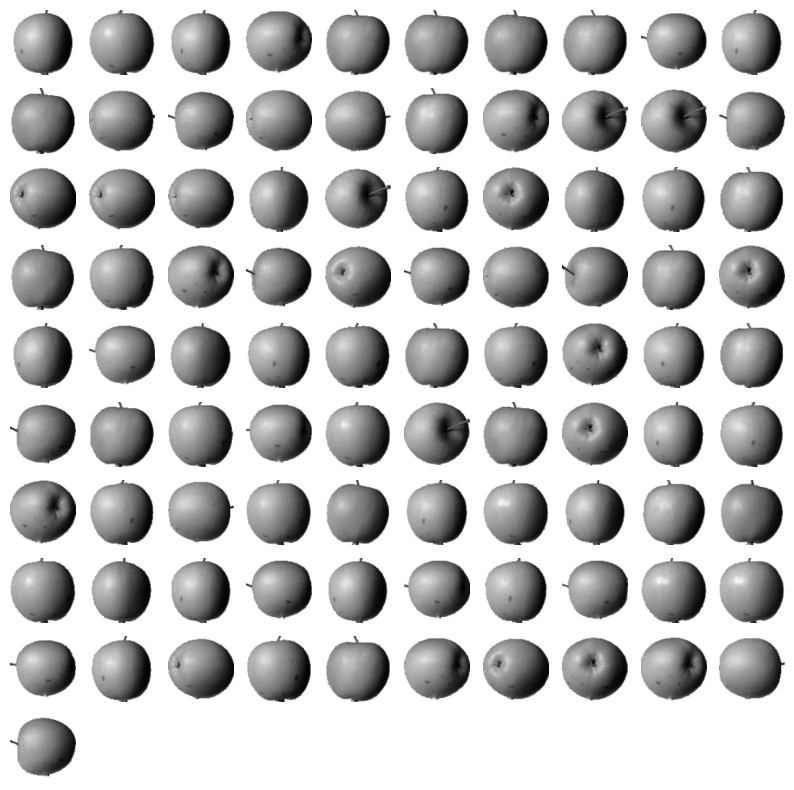

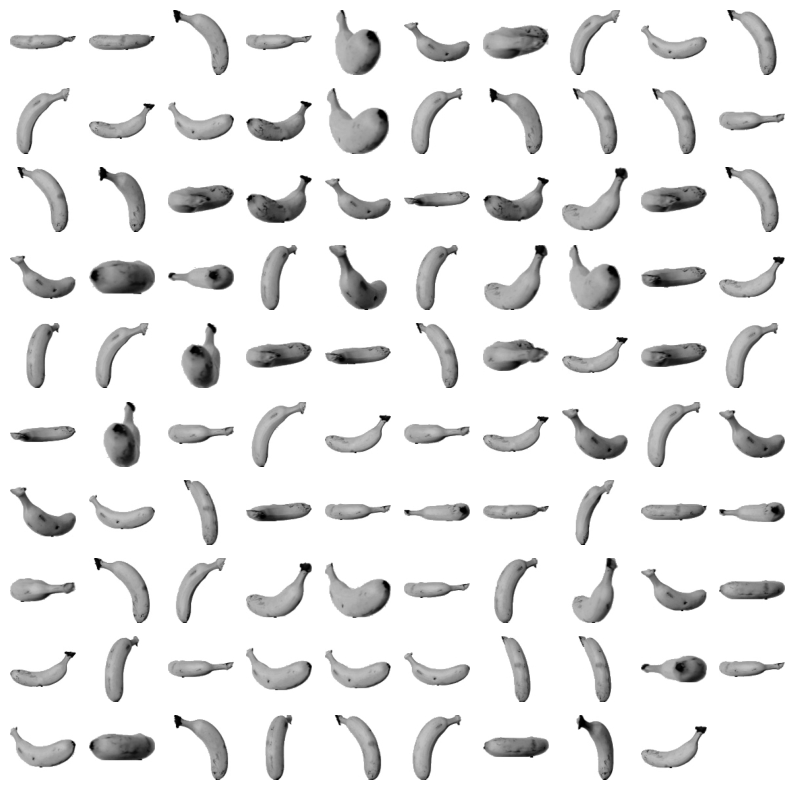

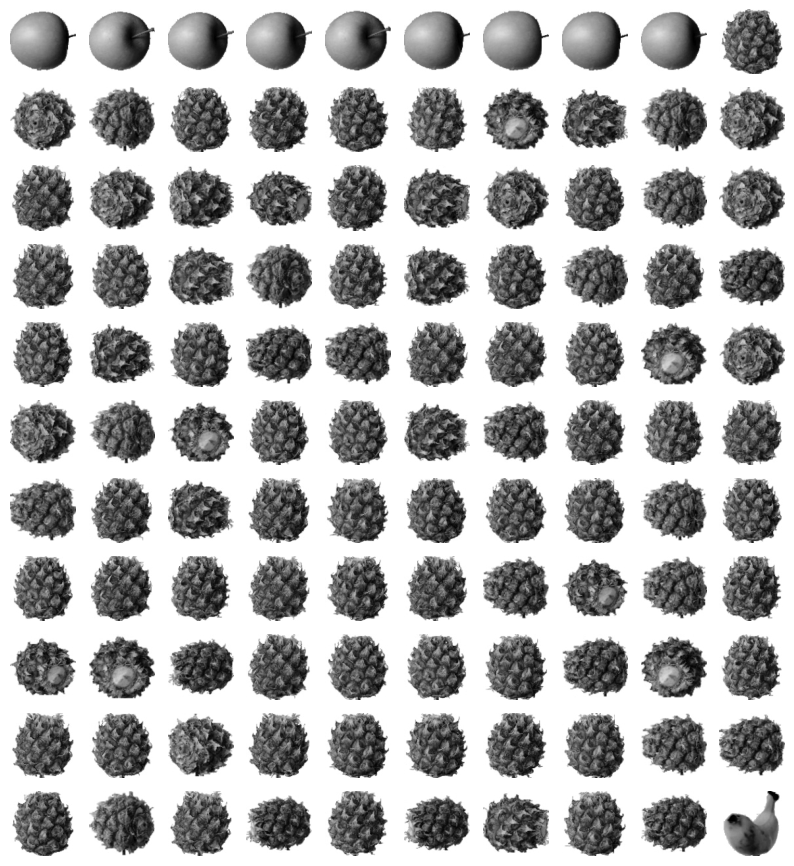

In [25]:
## 각 레이블별 분류를 이미지로 확인
for label in range(0,3):
    draw_fruits(arr_fruits[c_km.labels_ == label])
    print("\n")

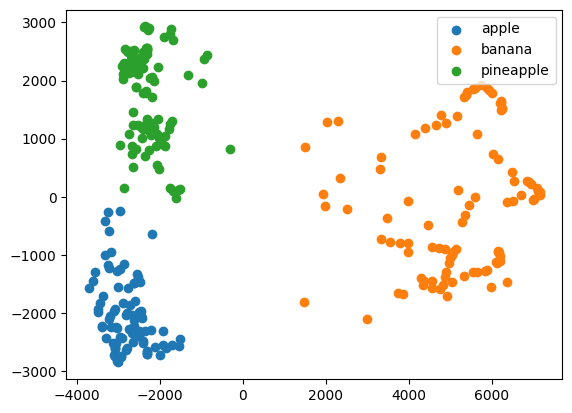

In [26]:
## 각 레이블별 분포를 그래프로 확인
## k-평균 구간도 간접적으로 확인
for label in range(0,3):
    data = c_fruits_pca[c_km.labels_ == label]
    plt.scatter(data[:,0],data[:,1])

plt.legend(['apple','banana','pineapple'])
plt.show()